In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rollercoaster-database/coaster_db.csv
/kaggle/input/rollercoaster-database/flipflap.jpg


In [2]:
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)


In [3]:
df=pd.read_csv('/kaggle/input/rollercoaster-database/coaster_db.csv')

# Step-1: Data Understanding
- Dataframe shape
- head and tail
- dtypes
- describe

In [4]:
df.shape

(1087, 56)

In [5]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [6]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [8]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# 2. Cleaning The Data
- Getting most important variables from all columns
- 

In [9]:
df = df[['coaster_name',
    # 'Length', 'Speed', 
'Location', 'Status', 
# 'Opening date',
       # 'Type', 
    'Manufacturer',
# 'Height restriction', 'Model', 'Height',
       # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       # 'Track layout', 'Fastrack available', 'Soft opening date.1',
       # 'Closing date', 
# 'Opened', 
# 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
       # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
'latitude', 'longitude', 
'Type_Main',
       'opening_date_clean',
# 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
# 'height_value', 'height_unit',
'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [10]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [11]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

## Rename the Columns

In [12]:

df= df.rename(columns={'coaster_name':'Coaster_Name',
                 'year_introduced': 'Year_Introduced',
                   'latitude': 'Latitude',
                   'longitude': 'Longitude',
                   'opening_date_clean':'Opening_Date_Clean',
                   'speed_mph':'Speed_mph',
                   'height_ft': 'Height_ft',
                   'Inversions_clean':'Inversions_Clean',
                   'Gforce_clean': 'Gforce'})



In [13]:
df.isna().sum()

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
Latitude              275
Longitude             275
Type_Main               0
Opening_Date_Clean    250
Speed_mph             150
Height_ft             916
Inversions_Clean        0
Gforce                725
dtype: int64

In [14]:
# df.duplicated()

df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce


In [15]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [16]:
df.query('Manufacturer == "Fred W. Pearce"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce
14,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1911,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN


In [17]:
# Check for Duplicate Coaster_Name
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [18]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date_Clean', 'Speed_mph',
       'Height_ft', 'Inversions_Clean', 'Gforce'],
      dtype='object')

In [19]:
df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date_Clean'])]\
    .reset_index(drop=True).copy()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


# Step 3: Feature Understanding
(Univariate Analysis) 
- Plotting Feature Distribution
  1. Histogram
  2. KDE
  3. Boxplot

Text(0, 0.5, 'Count')

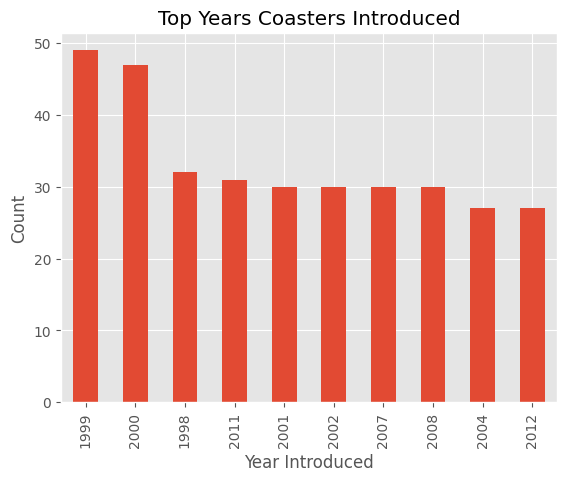

In [20]:
 ax = df['Year_Introduced'].value_counts() \
    .head(10)\
    .plot(kind='bar', title='Top Years Coasters Introduced')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed(mph)')

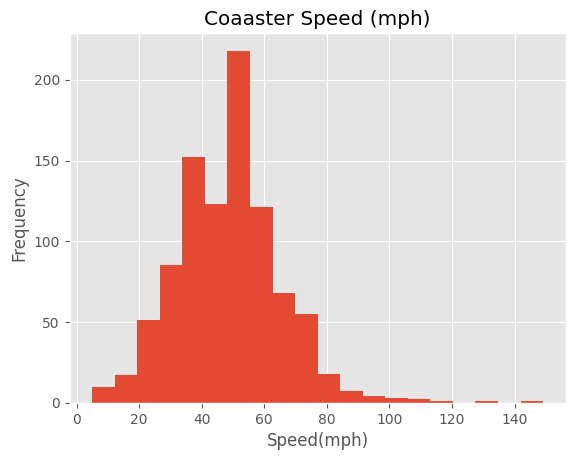

In [21]:
bx = df['Speed_mph'].plot(kind='hist',
                           bins=20,
                          title= 'Coaaster Speed (mph)')
bx.set_xlabel('Speed(mph)')

Text(0.5, 0, 'Speed(mph)')

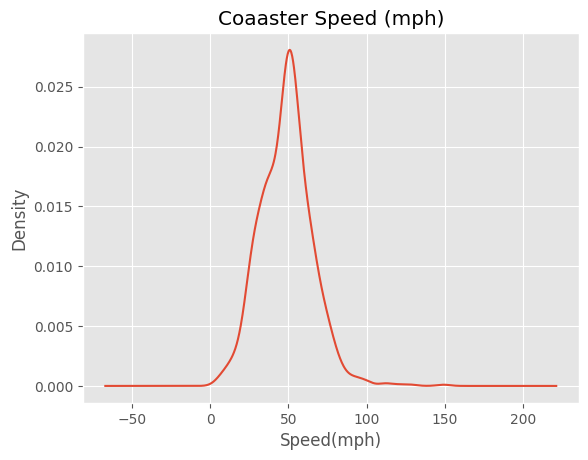

In [22]:
bx = df['Speed_mph'].plot(kind='kde',
                          title= 'Coaaster Speed (mph)')
bx.set_xlabel('Speed(mph)')

# Step-4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparison

In [23]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date_Clean', 'Speed_mph',
       'Height_ft', 'Inversions_Clean', 'Gforce'],
      dtype='object')

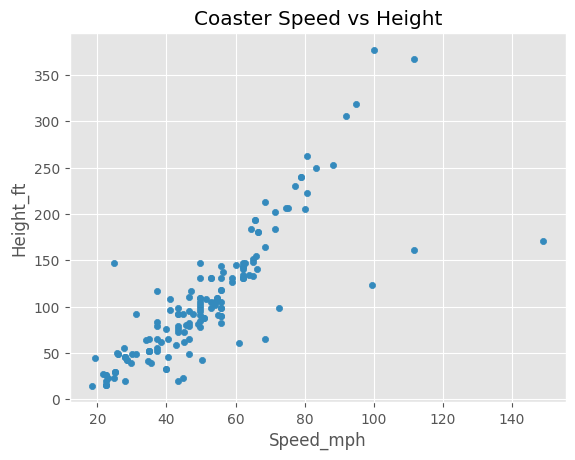

In [24]:
df.plot(kind='scatter',
        x='Speed_mph',
        y='Height_ft',
       title='Coaster Speed vs Height')
plt.show()

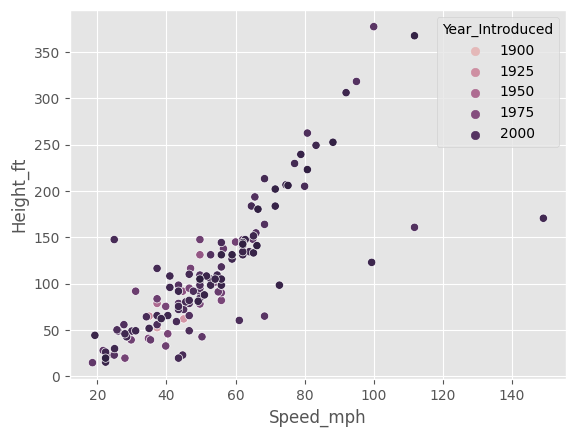

In [25]:
sns.scatterplot(x='Speed_mph',
                 y='Height_ft',
                hue='Year_Introduced',
                # title= 'Speed vs Height',
                data=df)
plt.show()

In [26]:
df.columns


Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date_Clean', 'Speed_mph',
       'Height_ft', 'Inversions_Clean', 'Gforce'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

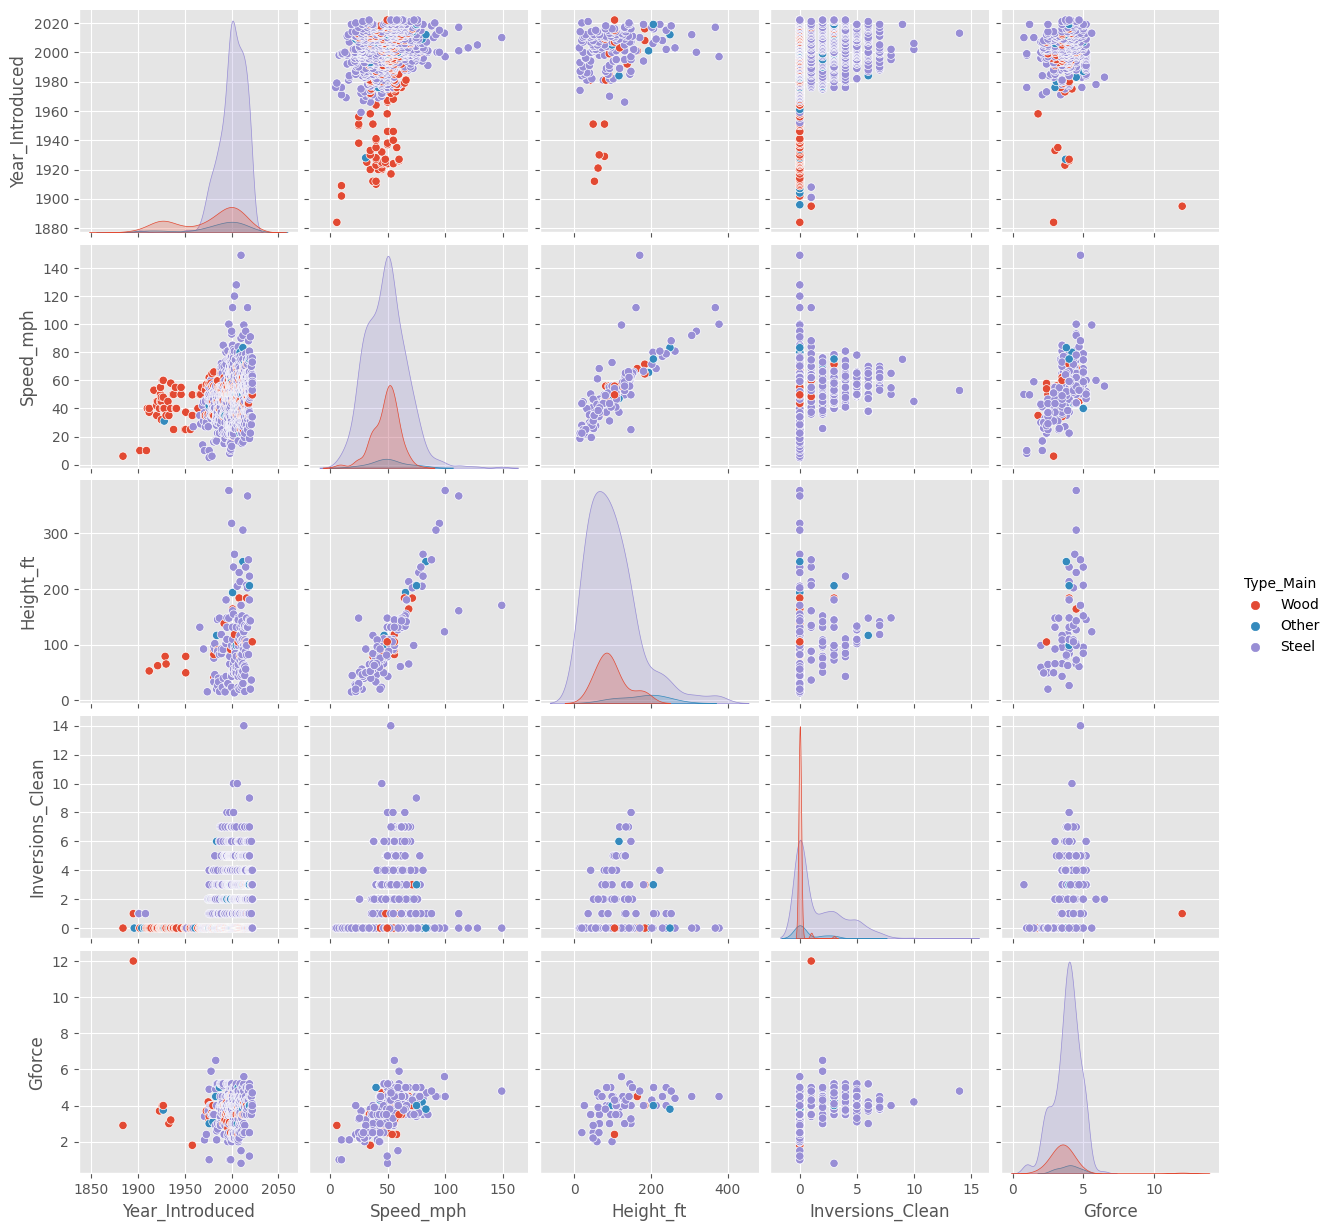

In [27]:
sns.pairplot(df, vars=['Year_Introduced','Speed_mph',
                      'Height_ft', 'Inversions_Clean','Gforce'],
                    hue='Type_Main')
plt.show()

In [28]:
df_corr=df[['Year_Introduced','Speed_mph',
    'Height_ft', 'Inversions_Clean',
    'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions_Clean,Gforce
Year_Introduced,1.000000,0.178619,0.145457,-0.172829,0.168763
Speed_mph,0.178619,1.000000,0.734499,-0.026413,0.605090
Height_ft,0.145457,0.734499,1.000000,-0.076255,0.460841
Inversions_Clean,-0.172829,-0.026413,-0.076255,1.000000,0.270942
Gforce,0.168763,0.605090,0.460841,0.270942,1.000000


<Axes: >

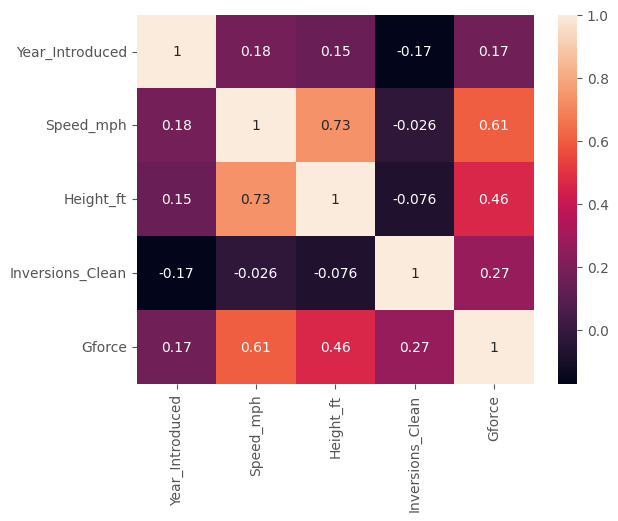

In [29]:
sns.heatmap(df_corr, annot=True)

# Step-5: Ask Questions About the Data
- Answer questions you ask about the data, using a plot or statistic value.
  1. what are the locations with the fastest roller coasters? (min of 10)
  2. where are the hieghest roller coaster  located
  3. which location have the most high speed roller coasters?
  4. who manf. the fastest roller coaster
  5. who manf. the highest roller coaster
  6. which roller coaster have the top Gforce.

In [30]:
# which roller coaster have the top Gforce
df.sort_values('Gforce', ascending=False)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
201,Moonsault Scramble,Fuji-Q Highland,Removed,Meisho Amusement Machines,1983,35.4870,138.7800,Steel,1983-06-24,55.9,NaN,2,6.5
154,Shock Wave (Six Flags Over Texas),Six Flags Over Texas,Operating,Anton Schwarzkopf,1978,32.7589,-97.0706,Steel,1978-04-22,60.0,NaN,2,5.9
903,Ring Racer,Nürburgring,Closed,S&S - Sansei Technologies,2013,50.3361,6.9492,Steel,2013-10-31,99.4,123.0,0,5.6
376,Eurostar (roller coaster),Other,NaN,Intamin,1995,NaN,NaN,Steel,NaT,50.2,NaN,4,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [31]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date_Clean', 'Speed_mph',
       'Height_ft', 'Inversions_Clean', 'Gforce'],
      dtype='object')

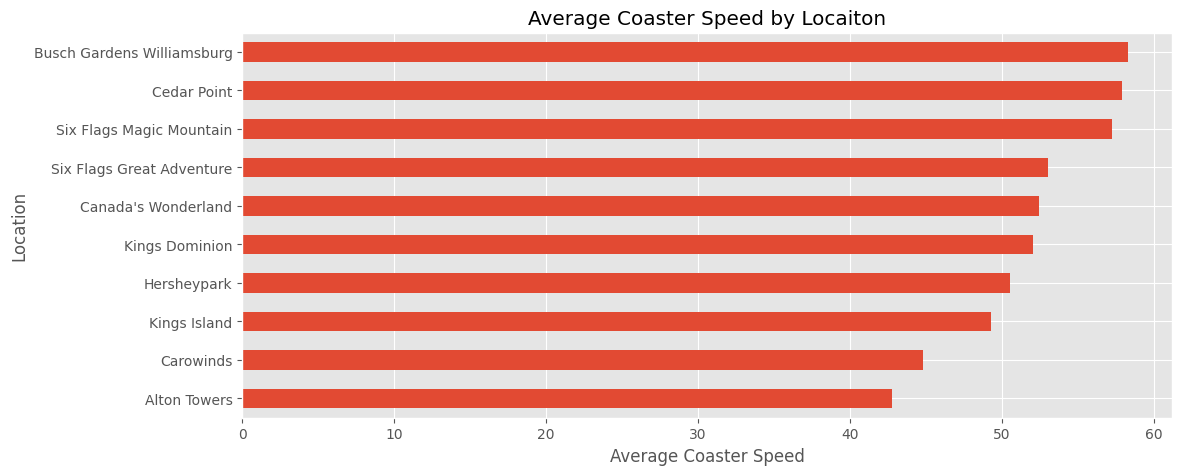

In [32]:
cx= df.query('Location != "Other"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count>=10')\
    .sort_values('mean')['mean']\
    .plot(kind='barh', figsize=(12,5), title='Average Coaster Speed by Locaiton')
cx.set_xlabel('Average Coaster Speed')
plt.show()

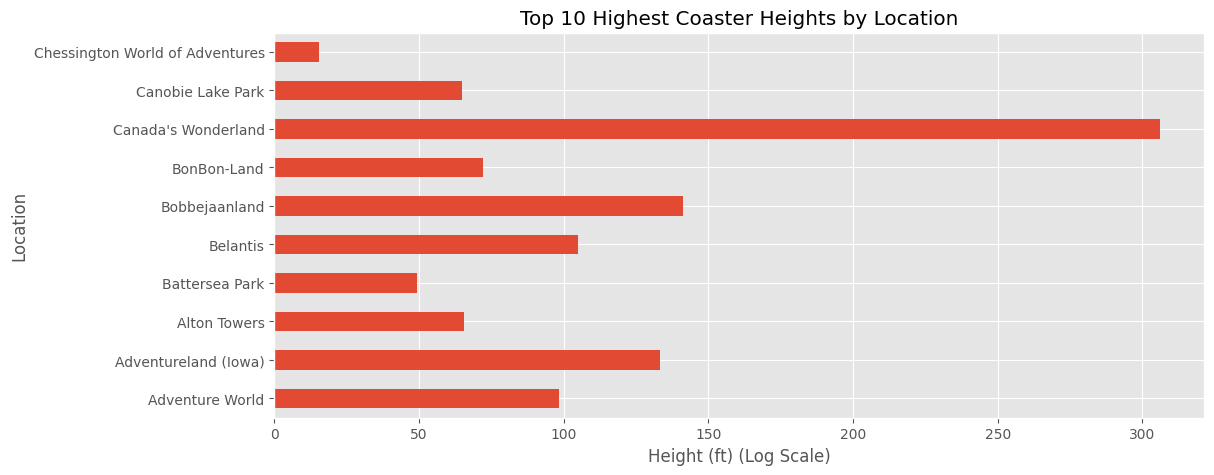

In [33]:
import matplotlib.pyplot as plt

# Filter the data, remove "Other" and check for zero or negative heights
valid_data = df.query('Location != "Other" & Height_ft > 0')

# Sort by 'Height_ft' and select top 10 highest coaster heights
top_10_heights = valid_data\
    .sort_values('Height_ft', ascending=True)\
    .groupby('Location')['Height_ft']\
    .max()\
    .head(10)

# Plot the bar plot
ax = top_10_heights.plot(kind='barh', figsize=(12, 5), title='Top 10 Highest Coaster Heights by Location')

# Set x-axis to logarithmic scale
# ax.set_xscale('log')

# Set labels
plt.xlabel('Height (ft) (Log Scale)')
plt.ylabel('Location')
plt.show()


In [34]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date_Clean', 'Speed_mph',
       'Height_ft', 'Inversions_Clean', 'Gforce'],
      dtype='object')

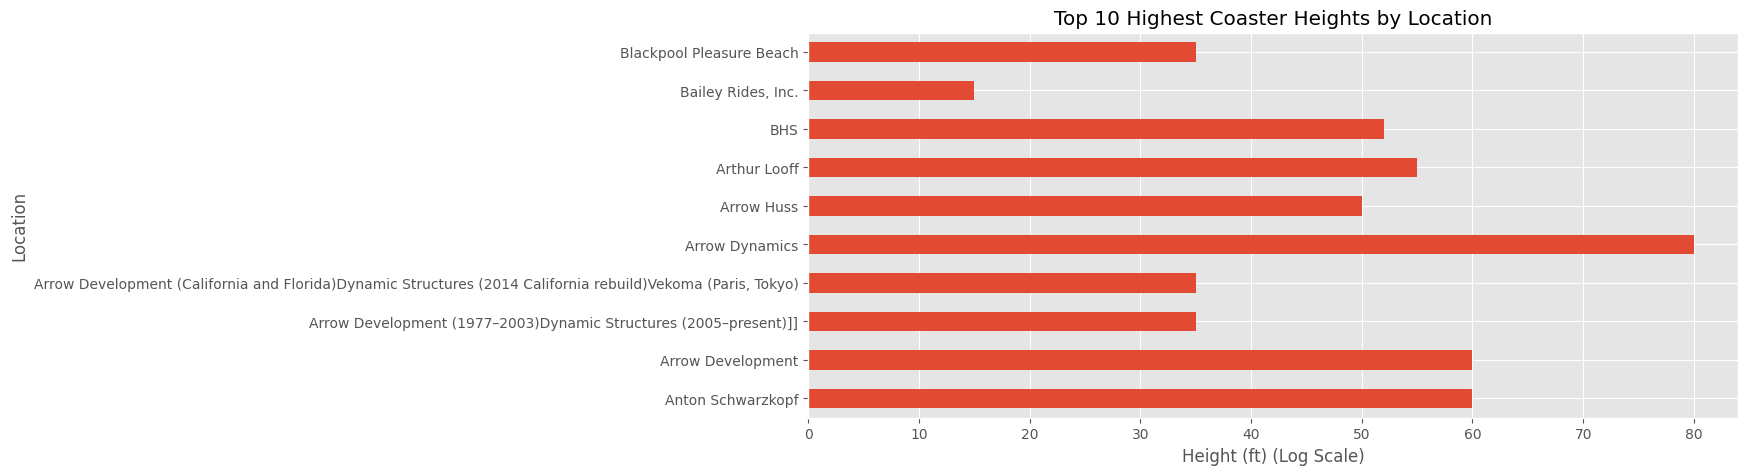

In [35]:
# who manf. the fastest roller coaster

import matplotlib.pyplot as plt

# Filter the data, remove "Other" and check for zero or negative heights
valid_data = df.query('Manufacturer != "Other" & Speed_mph > 0')

# Sort by 'Height_ft' and select top 10 highest coaster heights
top_10_heights = valid_data\
    .sort_values('Speed_mph', ascending=True)\
    .groupby('Manufacturer')['Speed_mph']\
    .max()\
    .head(10)

# Plot the bar plot
ax = top_10_heights.plot(kind='barh', figsize=(12, 5), title='Top 10 Highest Coaster Heights by Location')

# Set x-axis to logarithmic scale
# ax.set_xscale('log')

# Set labels
plt.xlabel('Height (ft) (Log Scale)')
plt.ylabel('Location')
plt.show()


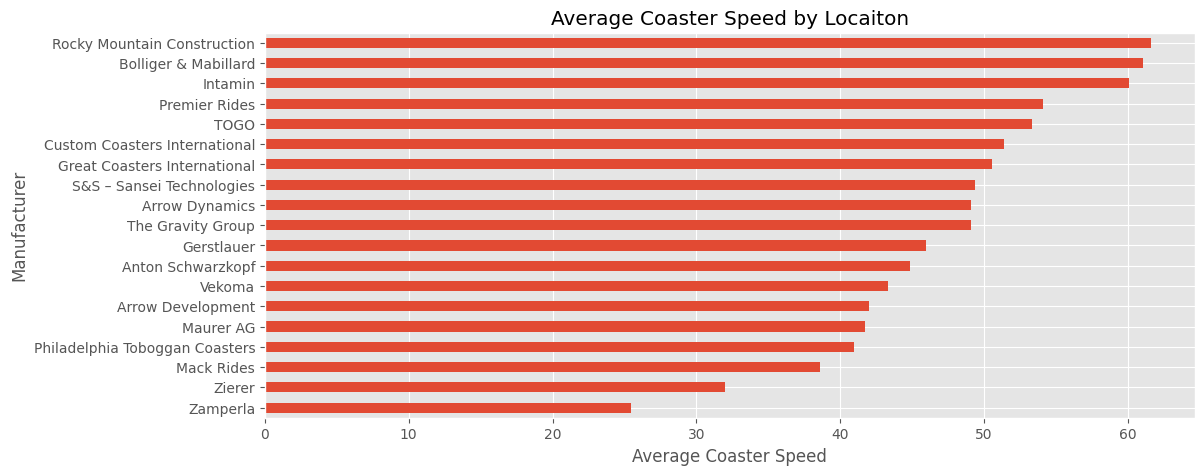

In [36]:
cx= df.query('Manufacturer != "Other"')\
    .groupby('Manufacturer')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count>=10')\
    .sort_values('mean')['mean']\
    .plot(kind='barh', figsize=(12,5), title='Average Coaster Speed by Locaiton')
cx.set_xlabel('Average Coaster Speed')
plt.show()

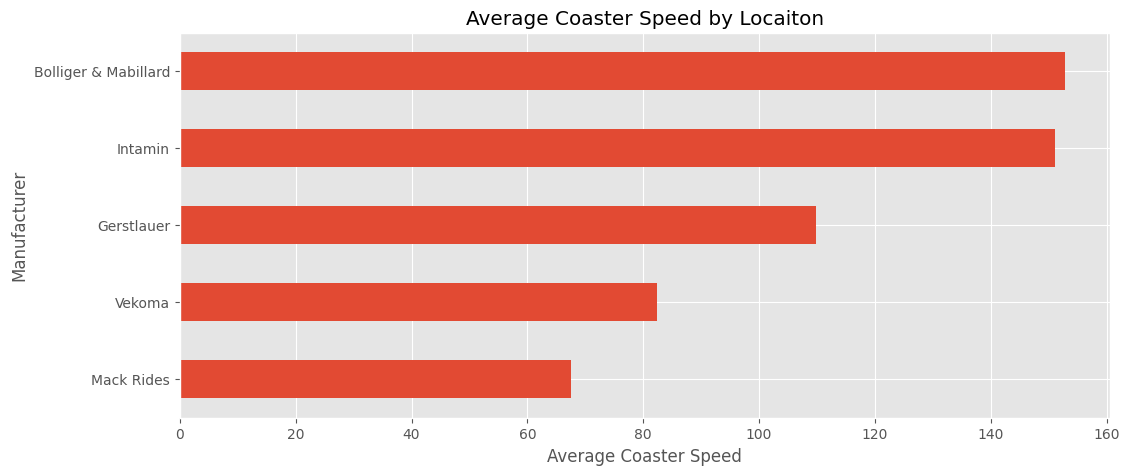

In [37]:
# who manf. the highest roller coaster
cx= df.query('Manufacturer != "Other"')\
    .groupby('Manufacturer')['Height_ft']\
    .agg(['mean','count'])\
    .query('count>=10')\
    .sort_values('mean')['mean']\
    .plot(kind='barh', figsize=(12,5), title='Average Coaster Speed by Locaiton')
cx.set_xlabel('Average Coaster Speed')
plt.show()
